In [48]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [49]:
# 데이터 불러오기
car = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\pandas-data-analysis-main\\cars (1).csv')
brand = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\pandas-data-analysis-main\\brand (1).csv')

In [50]:
brand

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States
5,volvo,Sweden
6,peugeot,France
7,bmw,Germany
8,citroen,France
9,mercedes-benz,Germany


In [51]:
car

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full


In [52]:
#car 데이터와 brand 데이터 병합
#카테고리형 변수를 숫자형태로 변환하기 
#결측치 처리하기 
#scaler활용해보기 
#국가별 총 브랜드 갯수 세어보기 
#상관관계 높은 변수들이 있는지 확인하기 

## 2. 데이터를 합칠 기준 설정하기
- title을 공통으로 가지고 있으니, title을 기준으로 모든 컬럼의 열을 추가하는 데이터를 만들 것 

In [53]:
# 문자열 문제(공백/대소문자) 검사: 일단 표준화해보기
#car['__title_s'] = car['title'].astype(str).str.strip().str.lower()
#brand['__title_s'] = brand['title'].astype(str).str.strip().str.lower()

- 두 데이터에 겹치지 않은 부분을 정확히 밝히는 검증단계 

In [54]:
#car_titles = set(car['__title_s'].unique())
#brand_titles = set(brand['__title_s'].unique())

- brand 기준으로 값을 설정할 것, 놓친 열을 추려보기 

In [55]:
#missing_in_brand = list(brand_titles - car_titles)
#print(missing_in_brand)

In [56]:
#merge_car_brand = list(brand_titles - car_titles)+list(car_titles - brand_titles)
#print(merge_car_brand)

In [57]:
#car_brand = pd.merge(car, brand, how='left', on='__title_s', indicator=True)
#print(car_brand.head())
#print(car_brand['_merge'].value_counts())

- title라는 변수에 띄어쓰기 기준으로 구분한 다음, 소문자로 변경 

In [60]:
car['brand title'] = car['title'].str.split(expand=True)[0].str.lower()

- brand에 title이라는 칼럼을 brand title로 변경, 열로 변경 

In [61]:
brand.rename({'title': 'brand title'}, axis=1, inplace=True)

- brand title을 기준으로 병합, 왼쪽을 기준으로 한다 

In [62]:
car_df = car.merge(brand, on='brand title', how='left')

- 중복값은 제거한다 

In [63]:
car_df = car_df.drop_duplicates()


- 문자를 숫자로 변환 

In [64]:
car_df = pd.get_dummies(car_df, 
    columns=['Fuel type','Body type','Gearbox','Service history','brand title','country'],
    drop_first=True)

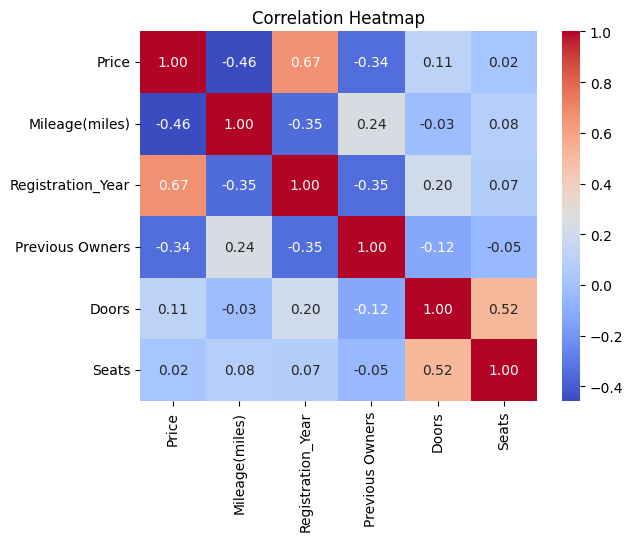

In [ ]:
import matplotlib.pyplot as plt  # matplotlib.pyplot import 추가

# 수치형 데이터만 선택하여 NaN 값 처리
# 수치형 데이터만 고르고, 결측치(NAN) 값을 각 컬럼의 평균값으로 채우기 
# np.number는 숫자형 데이터 타입을 의미
# fillna(car_df.mean(numeric_only=True)) 숫자형 컬럼만 골라 평균을 계산하고 결측치를 매꿔줘 
car_df_cleaned = car_df.select_dtypes(include=[np.number]).fillna(car_df.mean(numeric_only=True))

# 데이터의 숫자 컬럼들끼리 서로 얼마나 관련(상관관계)이 있는지 계산
correlation_matrix = car_df_cleaned.corr()

# heatmap 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
# ...existing code...